# Assignment 4

# Problem Statement : *Customer Segmentation Analysis*

## You own the mall and want to understand the customers who can quickly converge [Target Customers] so that the insight can be given to the marketing team and plan the strategy accordingly. Perform the below Tasks to complete the assignment:-

# *Clustering the data
# *by using the Classification Algorithms

# 1.Download the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load the dataset

In [2]:
data = pd.read_csv(r"Mall_Customers.csv")

In [3]:
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


# 3. Perform Below Visualizations.

### 1∙ Univariate Analysis

(array([31., 19., 34., 29., 16., 26., 15., 10.,  6., 14.]),
 array([18. , 23.2, 28.4, 33.6, 38.8, 44. , 49.2, 54.4, 59.6, 64.8, 70. ]),
 <BarContainer object of 10 artists>)

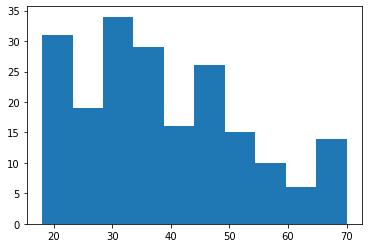

In [4]:
plt.hist(data['Age'])

### ∙ Bi- Variate Analysis

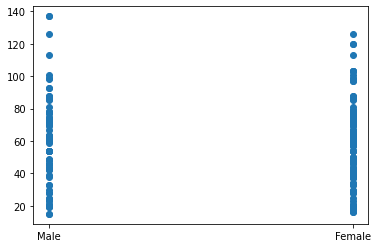

In [5]:
plt.scatter(data['Gender'],data['Annual Income (k$)'])

### ∙ Multi-Variate Analysis

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Annual Income (k$)', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>,
        <AxesSubplot:xlabel='Annual Income (k$)', ylabel='Annual Income (k$)'>]],
      dtype=object)

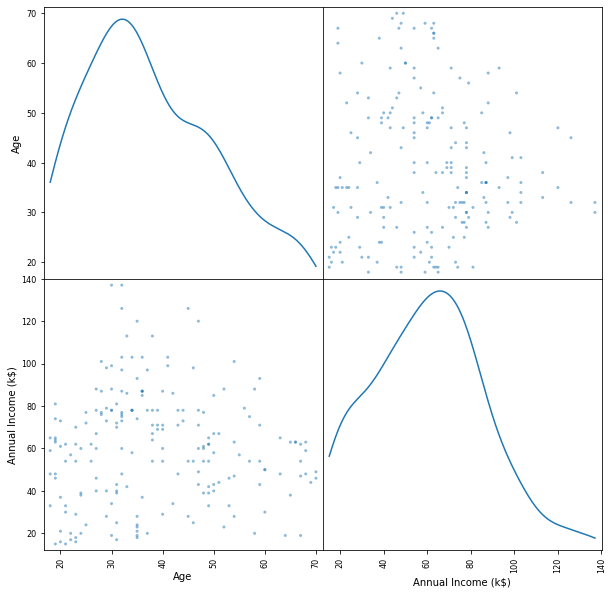

In [6]:
pd.plotting.scatter_matrix(data.loc[:,"Age":"Annual Income (k$)"] , diagonal ="kde", figsize=(10,10))

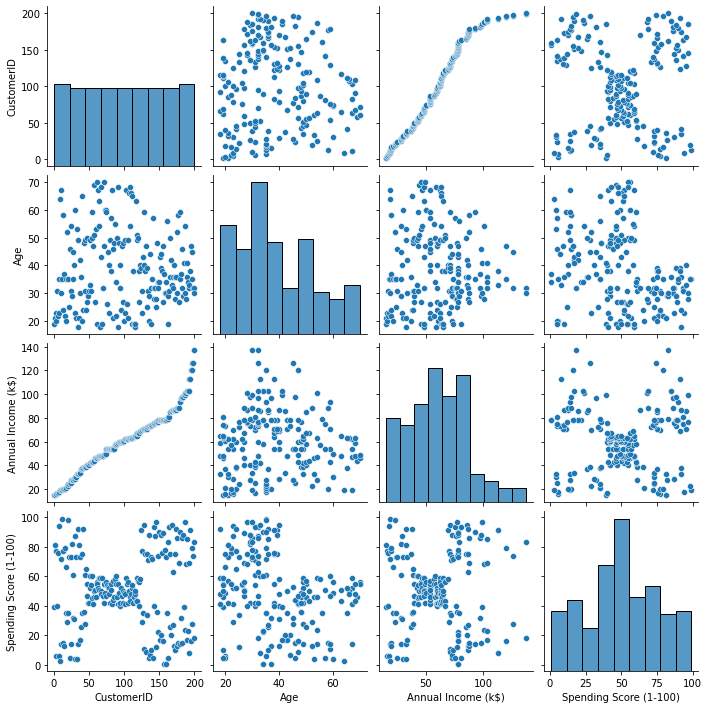

In [7]:
sns.pairplot(data)


# 4. Perform descriptive statistics on the dataset.

In [8]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


# 5. Check for Missing values and deal with them.

In [10]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# 6. Find the outliers and replace them outliers

<AxesSubplot:xlabel='CustomerID'>

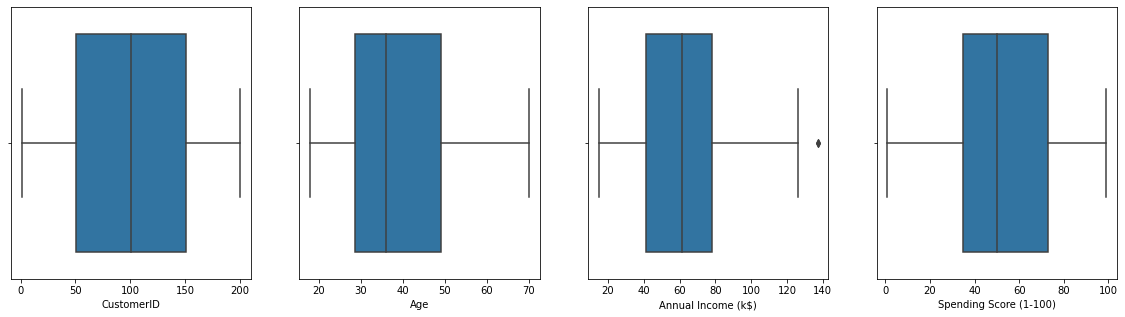

In [11]:
fig,ax=plt.subplots(figsize=(25,5))

plt.subplot(1, 5, 2)
sns.boxplot(x=data['Age'])

plt.subplot(1, 5, 3)
sns.boxplot(x=data['Annual Income (k$)'])

plt.subplot(1, 5, 4)
sns.boxplot(x=data['Spending Score (1-100)'])

plt.subplot(1, 5, 1)
sns.boxplot(x=data['CustomerID'])

## Handling outlier

In [12]:
quant=data.quantile(q=[0.25,0.75])
quant

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0.25,50.75,28.75,41.5,34.75
0.75,150.25,49.00,78.0,73.00


In [13]:
quant.loc[0.75]

CustomerID                150.25
Age                        49.00
Annual Income (k$)         78.00
Spending Score (1-100)     73.00
Name: 0.75, dtype: float64

In [14]:
quant.loc[0.25]

CustomerID                50.75
Age                       28.75
Annual Income (k$)        41.50
Spending Score (1-100)    34.75
Name: 0.25, dtype: float64

In [15]:
iqr=quant.loc[0.75]-quant.loc[0.25]
iqr

CustomerID                99.50
Age                       20.25
Annual Income (k$)        36.50
Spending Score (1-100)    38.25
dtype: float64

In [16]:
low=quant.loc[0.25]-(1.5 *iqr)
low

CustomerID               -98.500
Age                       -1.625
Annual Income (k$)       -13.250
Spending Score (1-100)   -22.625
dtype: float64

In [17]:
up=quant.loc[0.75]+(1.5 *iqr)
up

CustomerID                299.500
Age                        79.375
Annual Income (k$)        132.750
Spending Score (1-100)    130.375
dtype: float64

In [18]:
data['Annual Income (k$)']= np.where(data['Annual Income (k$)']>132,60,data['Annual Income (k$)'])

<AxesSubplot:xlabel='Annual Income (k$)'>

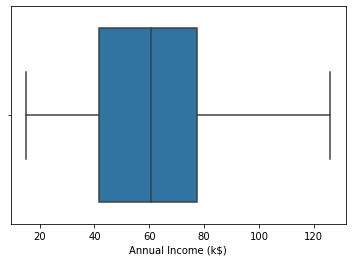

In [19]:
sns.boxplot(x=data['Annual Income (k$)'])

# 7. Check for Categorical columns and perform encoding.

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [21]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [22]:
data['Gender'].replace({'Male':1,"Female":0},inplace=True)

In [23]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,60,18


# 8. Scaling the data

In [24]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()

In [25]:
df=sc.fit_transform(data.iloc[:,1:])

In [26]:
df

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00900901, 0.05102041],
       [0.        , 0.09615385, 0.00900901, 0.7755102 ],
       [0.        , 0.25      , 0.01801802, 0.39795918],
       [0.        , 0.07692308, 0.01801802, 0.76530612],
       [0.        , 0.32692308, 0.02702703, 0.05102041],
       [0.        , 0.09615385, 0.02702703, 0.94897959],
       [1.        , 0.88461538, 0.03603604, 0.02040816],
       [0.        , 0.23076923, 0.03603604, 0.7244898 ],
       [1.        , 0.94230769, 0.03603604, 0.13265306],
       [0.        , 0.32692308, 0.03603604, 1.        ],
       [0.        , 0.76923077, 0.04504505, 0.14285714],
       [0.        , 0.11538462, 0.04504505, 0.7755102 ],
       [1.        , 0.36538462, 0.04504505, 0.12244898],
       [1.        , 0.07692308, 0.04504505, 0.79591837],
       [0.        , 0.32692308, 0.05405405, 0.34693878],
       [1.        , 0.03846154,

# 9. Perform any of the clustering algorithms

#### Kmeans_clustering

In [27]:
from sklearn.cluster import KMeans

In [28]:
TWSS=[]
k=list(range(2,9))

for i in k:
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(data)
    TWSS.append(kmeans.inertia_)

In [29]:
TWSS

[381550.6840684068,
 268082.56760639744,
 191630.05635683757,
 153791.95873953708,
 119223.63779954852,
 101388.39788480637,
 85773.02533022531]

Text(0, 0.5, 'TWSS')

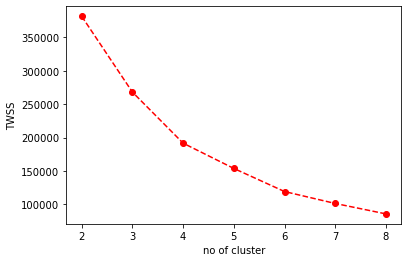

In [30]:
plt.plot(k,TWSS,'ro--')
plt.xlabel('no of cluster')
plt.ylabel('TWSS')

In [31]:
#selecting  4 clusters

model=KMeans(n_clusters=4)

model.fit(data)

KMeans(n_clusters=4)

In [32]:
model.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [33]:
mb=pd.Series(model.labels_)

In [34]:
data.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


# 10. Add the cluster data with the primary dataset

In [35]:
data['clust']=mb

In [36]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clust
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,2
3,4,0,23,16,77,2
4,5,0,31,17,40,2


In [37]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clust
195,196,0,35,120,79,1
196,197,0,45,126,28,3
197,198,1,32,126,74,1
198,199,1,32,60,18,3
199,200,1,30,60,83,1


# 11. Split the data into dependent and independent variables

In [38]:
#dependent
y= data['clust']
y

0      2
1      2
2      2
3      2
4      2
      ..
195    1
196    3
197    1
198    3
199    1
Name: clust, Length: 200, dtype: int32

In [39]:
#independent
x= data.drop(columns=['CustomerID','clust'],axis=1)
x.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [40]:
x.tail()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,60,18
199,1,30,60,83


# 12. Split the data into training and testing

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# 13. Build the Model

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rf=RandomForestClassifier()

# 14. Train the Model

In [45]:
rf.fit(x_train,y_train)

RandomForestClassifier()

# 15. Test the Model

In [46]:
#prediction
pred=rf.predict(x_test)

# 16. Measure the performance using Evaluvation Metrics

In [47]:
# Accuracy of DI model
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.975

In [48]:
#confusion matrix
from sklearn import metrics
metrics.confusion_matrix(y_test,pred)

array([[ 8,  0,  1,  0],
       [ 0, 10,  0,  0],
       [ 0,  0, 13,  0],
       [ 0,  0,  0,  8]], dtype=int64)